# Einfluss des Kontrasts auf wahrgenommenes Alter des Bildes
## Ömer Bayçelebi,  Saman Akbari, Anna Elena Dumat, Erdem Balli
### Seminar: Visuelle Wahrnehmung beim Menschen und Bildqualität - WiSe 2020/21

In [1]:
from PIL import Image # Pillow image library
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

import pandas as pd
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

## 1. Einleitung

Der Kontrast eines Bildes bezeichnet den Unterschied zwischen hellen und dunklen Bereichen eines Bildes. Die Bilder haben im Laufe der Zeit durch die ändernden Kameratechnologien, einen Wandel durchlebt. Unsere Forschungsfrage war, ob der Kontrast eines Bildes das wahrgenommene Alter beeinflusst.

## 2. Experimentelles Design

Um unsere Frage zu testen, haben wir Bilder aus 4 verschiedenen Oberkategorien ausgesucht. Welche da wären, Landschaft, Gebäude, Mensch und Anime/Cartoon. Desweiteren wurden die Landschaftsbilder in die 6 Unterkategorien Schnee, Meer_See_Strand, Berge, Wald, Wiese und Wüste unterteilt. Dies ist jedoch erst bei den Ergebnissen von Bedeutung. Die Beobachter haben in zufälliger Reihenfolge je 20 Bilder aus den verschiedenen Oberkategorien gezeigt bekommen, bei denen sie das wahgenommene Alter durch die Auswahl eines Intervalls bestimmen konnten. Jedes Bild aus den Kategorien wurden in den folgenden fünf Kontrasteinstellungen gezeigt: 0.3, 0.5, 1.0, 1.5, 2.5. Hierbei besitzt das Ursprungsbild den Wert 1.0 als Kontrasteinstellung. Die Veränderung der Kontraste der Ursprungsbilder wurden mit dem Phyton Package Pillow durchgeführt.


Die folgenden Abbildungen zeigen jeweils 1 Bild mit den jeweils zuvor definierten Kontrasteinstellungen je Oberkategorie.

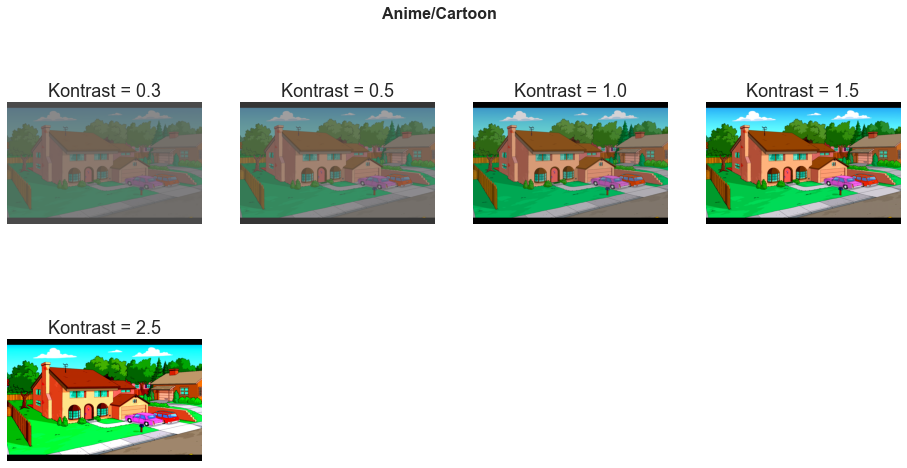

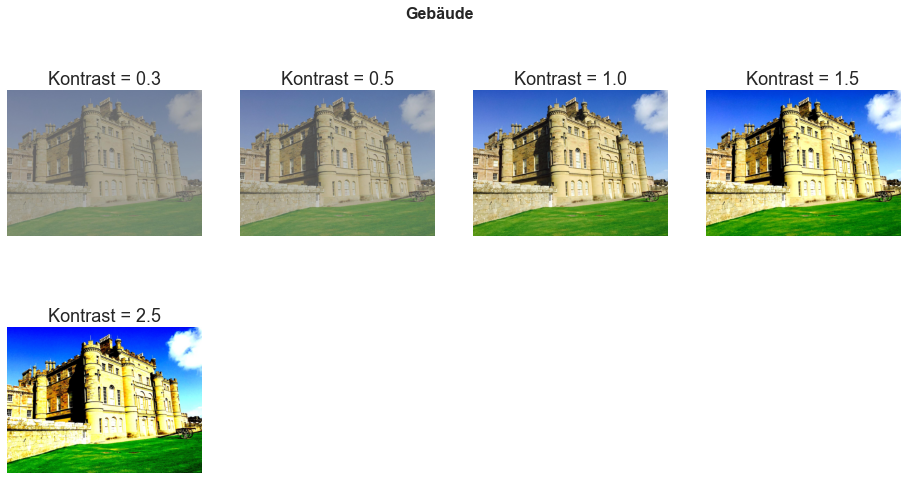

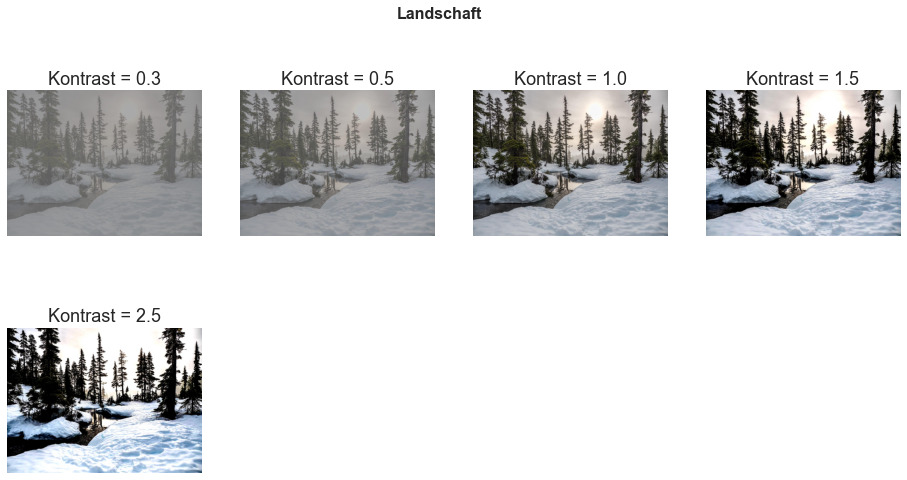

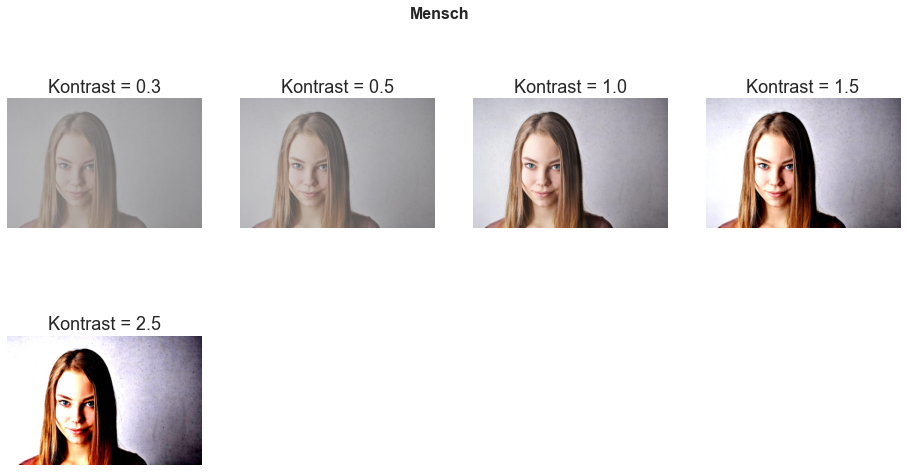

In [2]:
contrasts = [0.3,0.5,1.0,1.5,2.5]

plt.figure(figsize=(16, 8))
plt.suptitle("Anime/Cartoon",size=16, weight="semibold")
for i, q in enumerate(contrasts):
    im = np.array(Image.open('stimuli/Anime_Cartoon/Simpsons/Simpsons 1.png_/CONTRAST_%s_Simpsons 1.png' % q))
    plt.subplot(2, 4, i+1)
    plt.imshow(im,vmin=0, vmax=255); 
    plt.axis('off')
    plt.title('Kontrast = %s' % q)

plt.figure(figsize=(16, 8))
plt.suptitle("Gebäude",size=16, weight="semibold")
for i, q in enumerate(contrasts):
    im = np.array(Image.open('stimuli/Gebäude/Gebäude 1.jpg_/CONTRAST_%s_Gebäude 1.jpg' % q))
    plt.subplot(2, 4, i+1)
    plt.imshow(im,vmin=0, vmax=255); 
    plt.axis('off')
    plt.title('Kontrast = %s' % q)
    
plt.figure(figsize=(16, 8))
plt.suptitle("Landschaft",size=16, weight="semibold")
for i, q in enumerate(contrasts):
    im = np.array(Image.open('stimuli/Landschaft/Schnee/pexels-james-wheeler-1552212.jpg_/CONTRAST_%s_pexels-james-wheeler-1552212.jpg' % q))
    plt.subplot(2, 4, i+1)
    plt.imshow(im,vmin=0, vmax=255); 
    plt.axis('off')
    plt.title('Kontrast = %s' % q)
    
plt.figure(figsize=(16, 8))
plt.suptitle("Mensch",size=16, weight="semibold")
for i, q in enumerate(contrasts):
    im = np.array(Image.open('stimuli/Mensch/pexels-andrea-piacquadio-3769028.jpg_/CONTRAST_%s_pexels-andrea-piacquadio-3769028.jpg' % q))
    plt.subplot(2, 4, i+1)
    plt.imshow(im,vmin=0, vmax=255); 
    plt.axis('off')
    plt.title('Kontrast = %s' % q)    

Wir haben Wahrnehmungsskalen mittels der Methode des Single Point Assesment gemessen. Hierbei konnten die Beobachter von einer Skala von 0 bis 5 auswählen, für wie alt sie das Bild warnehmen, wobei jede Zahl ein Altersintervall respräsentiert. Da 5 Kontraststufen auf insgesamt 100 Bilder angewandt wurden, ergaben sich insgesamt 500 Durchgänge pro Beobachter. Wir haben 14 Beobachter getestet, die jeweils etwa 20 Minuten gebraucht haben. Durch individuelle Pausen zur Vermeidung von Konzentrationsstörungen ergaben sich teilweise längere Versuchszeiten.

## 3. Ergebnisse

### Vorbereitung der Daten und Statistiken

Zuerst laden wir die Ergebnis-CSV in eine Panda Dataframe. Wir haben von 14 Versuchspersonen jeweils 500 Bewertungen gesammelt (100 Bilder mit 5 verschiedenen Kontrasteinstellungen). Daher haben wir 14*500 = 7000 Dateneinträge.

In [11]:
# Save to dataframe
df = pd.read_csv("design_rating_single_results.csv", encoding="iso-8859-1")
print(df.shape)

(7000, 7)


Anschließend wandeln wir die Ratings von der Befragung in das tatsächliche eingeschätze Alter des Bildes in Jahren um.

In [12]:
def calculate_age(rating):
    rating = int(rating)

    if rating == 1:
        return 2.5
    elif rating == 2:
        return 8.0
    elif rating == 3:
        return 15.5
    elif rating == 4:
        return 30.5
    elif rating == 5:
        return 70
    else:
        raise ValueError(f"Unknown rating received: {rating}.")
        
# Rating => age
df["Response"] = df["Response"].apply(lambda x: calculate_age(x))
# Rename response column to age
df = df.rename(columns={"Response": "Age"})
print(df)

      Trial                           File Name  Contrast       Category  \
0         0               pexels-pixabay-210243       1.5     Landschaft   
1         1                          Gebäude 21       1.5        Gebäude   
2         2  terricks-noah-n9R0MN3XGvY-unsplash       1.0         Mensch   
3         3                            Naruto 2       1.5  Anime_Cartoon   
4         4               pexels-pixabay-210243       0.3     Landschaft   
...     ...                                 ...       ...            ...   
6995    495                            Naruto 6       1.5  Anime_Cartoon   
6996    496          pexels-anna-shvets-5325886       2.5         Mensch   
6997    497      pexels-sebastiaan-stam-1304647       0.3         Mensch   
6998    498            pexels-cottonbro-4153800       0.5         Mensch   
6999    499      pexels-sebastiaan-stam-1304647       2.5         Mensch   

     Subcategory   Age  Response Time  
0          Berge   8.0       5.604933  
1      

Wir entfernen alle Ratings mit einer schnelleren Reaktionszeit von 300ms, da dies die menschliche Reaktionszeit etwa beträgt und außerdem noch eine Entscheidung getroffen werden muss, die ebenfalls Zeit in Anspruch nimmt. Die Dateneinträge sinken auf 6984, d.h. 16 Bewertungen wurden verworfen.

In [13]:
df = df.drop(df[df["Response Time"] < 0.3].index)
print(df.shape)
print(df.describe())

(6984, 7)
             Trial     Contrast          Age  Response Time
count  6984.000000  6984.000000  6984.000000    6984.000000
mean    249.439003     1.159694    11.880513       2.501565
std     144.303249     0.788693    10.837753       4.335539
min       0.000000     0.300000     2.500000       0.311944
25%     124.750000     0.500000     8.000000       0.891662
50%     249.000000     1.000000     8.000000       1.390511
75%     374.000000     1.500000    15.500000       2.636271
max     499.000000     2.500000    70.000000     135.319601


### Scores der Hauptkategorien

Die Ergebnisse werden mit 95% Konfidenzintervallen angezeigt durch die blaue Markierung.

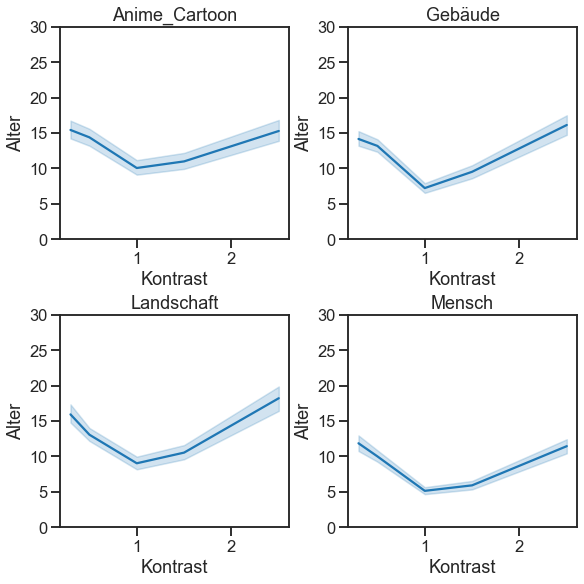

In [14]:
categories = ["Anime_Cartoon", "Gebäude", "Landschaft", "Mensch"]

# Category => plot (x: contrast, y: age)
def plot_score(category, x_pos, y_pos):
    if category in ["Anime_Cartoon", "Gebäude", "Landschaft", "Mensch"]:
        dataframe = df.loc[df["Category"] == category]
    elif category == "Overall":
        dataframe = df
    else:
        dataframe = df.loc[df["Subcategory"] == category]
    sns.lineplot(x="Contrast", y="Age", data=dataframe, ax=ax[x_pos, y_pos]).set(
        title=category,
        xlabel="Kontrast",
        ylabel="Alter",
        ylim=(0, 30)
    )

fig, ax = plt.subplots(2, 2, figsize=(8, 8), constrained_layout=True)

plot_score(categories[0], 0, 0)
plot_score(categories[1], 0, 1)
plot_score(categories[2], 1, 0)
plot_score(categories[3], 1, 1)

plt.savefig(f"figures/categories.png")

## Scores der Subkategorien

Die Ergebnisse werden mit 95% Konfidenzintervallen angezeigt durch die blaue Markierung.

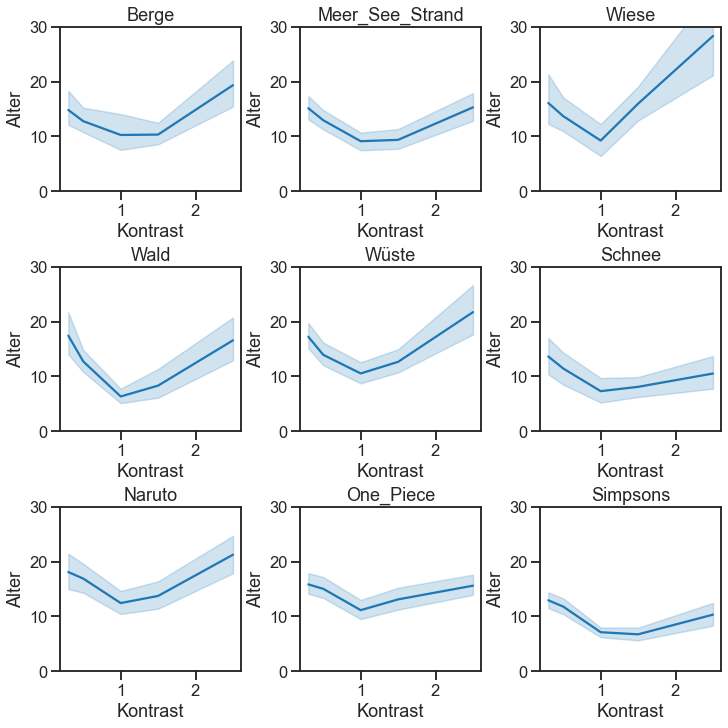

In [15]:
subcategories = ["Berge", "Meer_See_Strand", "Wiese", "Wald", "Wüste", "Schnee", "Naruto", "One_Piece", "Simpsons"]

fig, ax = plt.subplots(3, 3, figsize=(10, 10), constrained_layout=True)

plot_score(subcategories[0], 0, 0)
plot_score(subcategories[1], 0, 1)
plot_score(subcategories[2], 0, 2)
plot_score(subcategories[3], 1, 0)
plot_score(subcategories[4], 1, 1)
plot_score(subcategories[5], 1, 2)
plot_score(subcategories[6], 2, 0)
plot_score(subcategories[7], 2, 1)
plot_score(subcategories[8], 2, 2)

plt.savefig(f"figures/subcategories.png")

### Gesamtübersicht

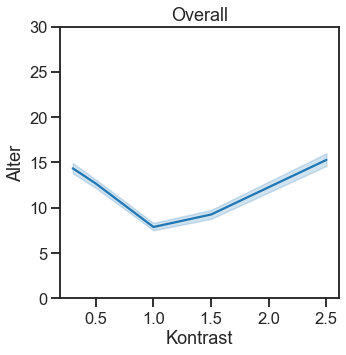

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), squeeze=False)
plot_score("Overall", 0, 0)
plt.savefig(f"figures/overall.png")

### Qualitative Beobachtungen

Wir konnten feststellen, dass der Kontrast des Bildes einen Einfluss auf das wahrgenommene Alter der Bildaufnahme hat. Bilder mit niedrigerem oder höheren Kontrast als die Standardeinstellung wurden stets als älter eingeschätzt. Dies war teilweise überraschend, da für uns subjektiv bei leichter Kontrasterhöhung im direkten Vergleich diese als moderner erschien durch lebendigere Farben. Nach Kategorien und Subkategorien unterteilt konnten wir, neben den Schwankungen durch kleinere Stichprobengröße, keine signifikanten Unterschiede feststellen. Lediglich bei der Kategorie "Mensch" lässt sich erkennen, dass diese im Durchschnitt als jünger eingeschätzt werden. Hierauf wird in der Diskussion eingegangen.

## 4. Diskussion

Wir können bestätigen, dass der Kontrast einen Einfluss auf das wahrgenommene Alter des Bildes hat. Bilder mit niedrigem Kontras, sowie Bilder mit höherem Kontras wurden älter eingeschätzt als das Originalbild. Diese Ergebnisse stimmen teilweise mir unseren angenommenen Erwartungen überein. Wir sind davon ausgegangen, dass die Verringerung des Kontrastes das Bild sofort älter wirken lässt aber die Erhöhung des Kontrastes das Bild bis zu einer gewissen Kontraststufe jünger wirken lässt. Allerdings kann man in unseren Ergebnissen sehen, dass unserer Probanden die Bilder bei jeder Kontrastveränderung älter geschätzt haben.
Wie bereits erwähnt wurden die Bilder aus der Kategorie Mensch relativ jung eingeschätzt im Vergleich zu den anderen Kategorien. Mögliche Ursachen hierfür könnten unterbewusst wahrgenommenen Eindrücke wie Kleidungsstil oder die Frisur sein.

### Mögliche Probleme 
Ein Problem welches sich rauskristallisierte war, dass die Teilnehmer teilweise nicht die ganze Befragung durchgeführt haben oder gegen Ende eine immer schnellere Antwortzeit hatten und wir deswegen davon ausgehen, dass die Aufmerksamkeit mit der Zeit abgenommen hat und die Antworten zu Anfang der Befragung waren. Generell war die Antwortzeit von beobachteten Probanden konsistenter als die der unbeobachteten Probanden. Ein weiteres Problem war, dass Bilder die sich zufälligerweise direkt wiederholten dieselbe Bewertung bekamen trotz unterschiedlicher Kontrasteinstellung.

### Offene Fragen
Da wir einen Unterschied in Abhängigkeit der Kategorien festgestellt haben, wäre es interessant zu sehen wie sich die Wahrnehmung bei weiteren Kategorien unterscheidet bzw. bei verschiedenen Tageszeiten (z. B. Bilder die Nachts aufgenommen wurden oder Bilder bei Sonnenaufgang). Eine weitere interessante Frage wäre  wie sich die Wahrnehmung bei unterschiedlichem Alter der Probanden verändert. Unsere Probanden waren bewusst alle ungefähr in demselben Alter.

### Referenzen
Stimuli-Bilder lizenzfrei über https://www.pexels.com/